In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train_df = pd.read_csv('playground-series-s4e12/train.csv')
test_df = pd.read_csv('playground-series-s4e12/test.csv')

original_df = pd.read_csv('archive/Insurance Premium Prediction Dataset.csv')

In [3]:
train_df.shape, test_df.shape, original_df.shape

((1200000, 21), (800000, 20), (278860, 20))

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1200000 non-null  int64  
 1   Age                   1181295 non-null  float64
 2   Gender                1200000 non-null  object 
 3   Annual Income         1155051 non-null  float64
 4   Marital Status        1181471 non-null  object 
 5   Number of Dependents  1090328 non-null  float64
 6   Education Level       1200000 non-null  object 
 7   Occupation            841925 non-null   object 
 8   Health Score          1125924 non-null  float64
 9   Location              1200000 non-null  object 
 10  Policy Type           1200000 non-null  object 
 11  Previous Claims       835971 non-null   float64
 12  Vehicle Age           1199994 non-null  float64
 13  Credit Score          1062118 non-null  float64
 14  Insurance Duration    1199999 non-

In [5]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800000 entries, 0 to 799999
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    800000 non-null  int64  
 1   Age                   787511 non-null  float64
 2   Gender                800000 non-null  object 
 3   Annual Income         770140 non-null  float64
 4   Marital Status        787664 non-null  object 
 5   Number of Dependents  726870 non-null  float64
 6   Education Level       800000 non-null  object 
 7   Occupation            560875 non-null  object 
 8   Health Score          750551 non-null  float64
 9   Location              800000 non-null  object 
 10  Policy Type           800000 non-null  object 
 11  Previous Claims       557198 non-null  float64
 12  Vehicle Age           799997 non-null  float64
 13  Credit Score          708549 non-null  float64
 14  Insurance Duration    799998 non-null  float64
 15  

In [6]:
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278860 entries, 0 to 278859
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Age                   274175 non-null  float64
 1   Gender                278860 non-null  object 
 2   Annual Income         264905 non-null  float64
 3   Marital Status        273841 non-null  object 
 4   Number of Dependents  250974 non-null  float64
 5   Education Level       278860 non-null  object 
 6   Occupation            197572 non-null  object 
 7   Health Score          268263 non-null  float64
 8   Location              278860 non-null  object 
 9   Policy Type           278860 non-null  object 
 10  Previous Claims       197572 non-null  float64
 11  Vehicle Age           278860 non-null  int64  
 12  Credit Score          250974 non-null  float64
 13  Insurance Duration    278860 non-null  int64  
 14  Premium Amount        277019 non-null  float64
 15  

In [7]:
train_df.head()

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,...,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,...,2.0,17.0,372.0,5.0,2023-12-23 15:21:39.134960,Poor,No,Weekly,House,2869.0
1,1,39.0,Female,31678.0,Divorced,3.0,Master's,NaN,15.569731,Rural,...,1.0,12.0,694.0,2.0,2023-06-12 15:21:39.111551,Average,Yes,Monthly,House,1483.0
2,2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,...,1.0,14.0,NaN,3.0,2023-09-30 15:21:39.221386,Good,Yes,Weekly,House,567.0
3,3,21.0,Male,141855.0,Married,2.0,Bachelor's,NaN,10.938144,Rural,...,1.0,0.0,367.0,1.0,2024-06-12 15:21:39.226954,Poor,Yes,Daily,Apartment,765.0
4,4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,...,0.0,8.0,598.0,4.0,2021-12-01 15:21:39.252145,Poor,Yes,Weekly,House,2022.0


In [8]:
train_df.columns = train_df.columns.str.lower().str.replace(" ", "_")
test_df.columns = test_df.columns.str.lower().str.replace(" ", "_")
original_df.columns = original_df.columns.str.lower().str.replace(" ", "_")

In [9]:
train_df = train_df.drop("id", axis=1)

### Exploring the data

In [10]:
train_df.describe(include="all").round(2).T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,1181295.0,NaN,NaN,NaN,41.15,13.54,18.0,30.0,41.0,53.0,64.0
gender,1200000,2,Male,602571,NaN,NaN,NaN,NaN,NaN,NaN,NaN
annual_income,1155051.0,NaN,NaN,NaN,32745.22,32179.51,1.0,8001.0,23911.0,44634.0,149997.0
marital_status,1181471,3,Single,395391,NaN,NaN,NaN,NaN,NaN,NaN,NaN
number_of_dependents,1090328.0,NaN,NaN,NaN,2.01,1.42,0.0,1.0,2.0,3.0,4.0
education_level,1200000,4,Master's,303818,NaN,NaN,NaN,NaN,NaN,NaN,NaN
occupation,841925,3,Employed,282750,NaN,NaN,NaN,NaN,NaN,NaN,NaN
health_score,1125924.0,NaN,NaN,NaN,25.61,12.2,2.01,15.92,24.58,34.53,58.98
location,1200000,3,Suburban,401542,NaN,NaN,NaN,NaN,NaN,NaN,NaN
policy_type,1200000,3,Premium,401846,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- all numerical features have different scales.
- cat columns have <= 4 distinct categories, so not many. 
- `education_level` and `exercise_frequency` can be encoded as ordinal variables. rest of the cat columns can be 1-hot encoded.
- can `number_of_dependents` be treated as a integer column and as a cat column? Yes, see below cell
- `annual_income` has very high std deviation, std is nearly = to the mean of annual_income
- `healthscore` in the original dataset seems to go beyond the max value we have in this competition's training dataset. But this comp's test set is within limits of training set healthscore.
- `previous_claims` is not about amount but the no. of times a person has used insurance claims before. Ranging from [0,9]. This variable has outliers.
- `insurance_duration` is a cat column.
- we can extract year from `policy_start_date` and that might be a useful feature given YoY inflation likely affects insurance premium. policy start dates range from 2019 to 2024
- `customer_feedback` is a cat variable. can be encoded as ordinal variable. 

In [11]:
train_df.number_of_dependents[~train_df.number_of_dependents.isnull()].astype(np.int64)

0          1
1          3
2          3
3          2
4          1
          ..
1199994    4
1199995    0
1199997    0
1199998    1
1199999    0
Name: number_of_dependents, Length: 1090328, dtype: int64

Since `number_of_dependents` does not contain dubious float values like 2.1, 3.7, etc we can treat it as an ordinal variable.

In [12]:
train_df.health_score.max()

58.97591405405534

In [13]:
test_df.health_score.max()

57.95735078742232

In [14]:
train_df.previous_claims

0          2.0
1          1.0
2          1.0
3          1.0
4          0.0
          ... 
1199995    NaN
1199996    NaN
1199997    0.0
1199998    1.0
1199999    0.0
Name: previous_claims, Length: 1200000, dtype: float64

In [15]:
train_df.insurance_duration[~train_df.insurance_duration.isnull()].astype(np.int64)

0          5
1          2
2          3
3          1
4          4
          ..
1199995    3
1199996    4
1199997    6
1199998    4
1199999    6
Name: insurance_duration, Length: 1199999, dtype: int64

In [16]:
pd.to_datetime(train_df.policy_start_date).dt.year.unique()

array([2023, 2024, 2021, 2022, 2020, 2019])

policy start dates range from 2019 to 2024

In [17]:
train_df.customer_feedback.unique()

array(['Poor', 'Average', 'Good', nan], dtype=object)

`customer_feedback` is a cat variable. can be encoded as ordinal variable. 

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'annual_income'}>,
        <Axes: title={'center': 'number_of_dependents'}>],
       [<Axes: title={'center': 'health_score'}>,
        <Axes: title={'center': 'previous_claims'}>,
        <Axes: title={'center': 'vehicle_age'}>],
       [<Axes: title={'center': 'credit_score'}>,
        <Axes: title={'center': 'insurance_duration'}>,
        <Axes: title={'center': 'premium_amount'}>]], dtype=object)

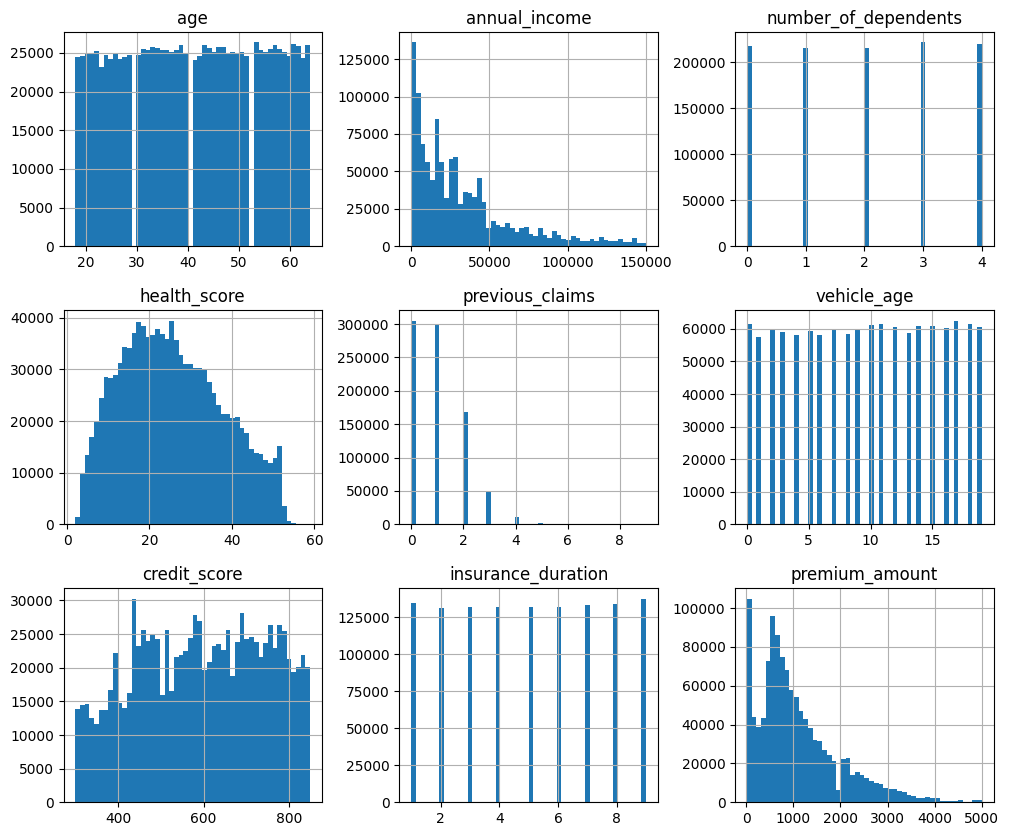

In [18]:
train_df.hist(bins=50, figsize=(12, 10))

- `annual_income` and `premium_amount` are skewed and need transformation.
- `credit_score` 's distribution is not very clear. maybe bucketizing would help.
- `health_score` 's distribution may also need some type of transformation. maybe bucketizing can be tried. 

<Axes: >

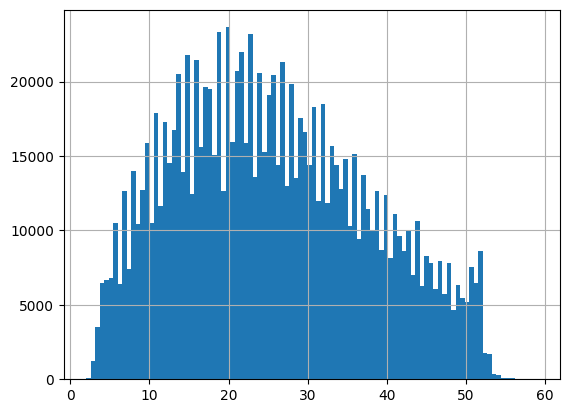

In [19]:
train_df.health_score.hist(bins= 100)

<Axes: >

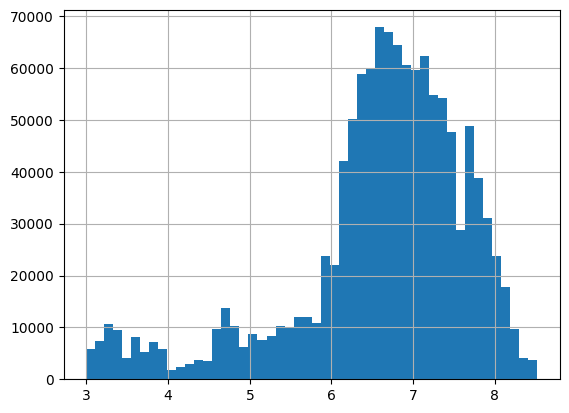

In [20]:
pd.Series(np.log(train_df.premium_amount)).hist(bins=50)

### Create a test set and keep it aside:

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
train_set, test_set = train_test_split(train_df, test_size=0.2, random_state=42)

In [12]:
train_set.shape, test_set.shape

((960000, 20), (240000, 20))

### Further EDA:

In [24]:
corr = train_set.corr(numeric_only=True)

In [25]:
corr

,age,annual_income,number_of_dependents,health_score,previous_claims,vehicle_age,credit_score,insurance_duration,premium_amount
age,1.000000,0.000478,0.001566,0.000596,0.002164,-0.002612,0.002261,0.000280,-0.002265
annual_income,0.000478,1.000000,0.002133,0.025528,0.041607,-0.000688,-0.201136,0.000277,-0.011563
number_of_dependents,0.001566,0.002133,1.000000,0.004716,-0.004262,0.000502,-0.001745,0.000229,-0.000749
health_score,0.000596,0.025528,0.004716,1.000000,0.001737,0.001024,0.011523,0.002360,0.016036
previous_claims,0.002164,0.041607,-0.004262,0.001737,1.000000,-0.000308,0.035855,0.002902,0.047092
vehicle_age,-0.002612,-0.000688,0.000502,0.001024,-0.000308,1.000000,0.001105,0.002858,-0.000360
credit_score,0.002261,-0.201136,-0.001745,0.011523,0.035855,0.001105,1.000000,0.000030,-0.025949
insurance_duration,0.000280,0.000277,0.000229,0.002360,0.002902,0.002858,0.000030,1.000000,-0.000358
premium_amount,-0.002265,-0.011563,-0.000749,0.016036,0.047092,-0.000360,-0.025949,-0.000358,1.000000


- previous_claims and credit_score are +vely correlated.
- annual_income and credit_score are -vely correlated (stronger). 

In [26]:
corr['premium_amount'].sort_values()

credit_score           -0.025949
annual_income          -0.011563
age                    -0.002265
number_of_dependents   -0.000749
vehicle_age            -0.000360
insurance_duration     -0.000358
health_score            0.016036
previous_claims         0.047092
premium_amount          1.000000
Name: premium_amount, dtype: float64

In [27]:
from pandas.plotting import scatter_matrix

In [28]:
train_set.columns

Index(['age', 'gender', 'annual_income', 'marital_status',
       'number_of_dependents', 'education_level', 'occupation', 'health_score',
       'location', 'policy_type', 'previous_claims', 'vehicle_age',
       'credit_score', 'insurance_duration', 'policy_start_date',
       'customer_feedback', 'smoking_status', 'exercise_frequency',
       'property_type', 'premium_amount'],
      dtype='object')

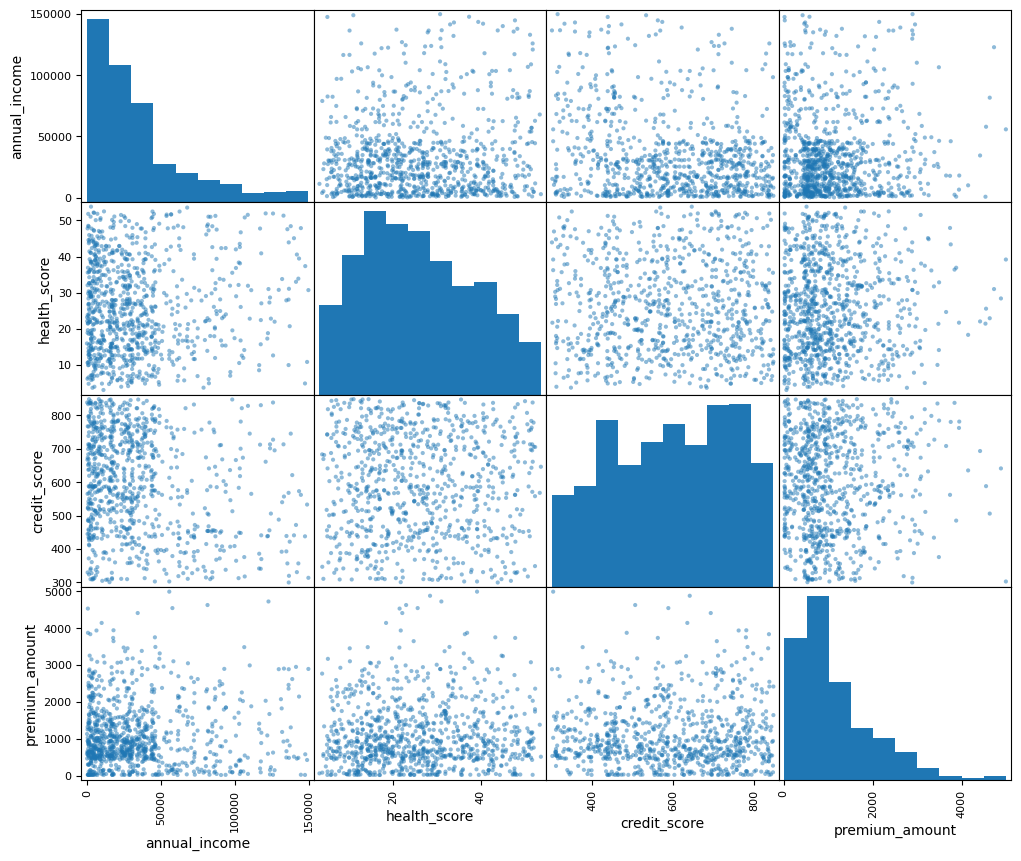

In [29]:
scatter_matrix(train_set[['annual_income', 'health_score', 'credit_score', 'premium_amount']].sample(1000), figsize=(12, 10))
plt.show()

- Linear correlations with the target variable are not standing out. 

### Preparation for ML algorithms:

- all numerical features have different scales.
- cat columns have <= 4 distinct categories, so not many. 
- `education_level` and `exercise_frequency` can be encoded as ordinal variables. rest of the cat columns can be 1-hot encoded.
- can `number_of_dependents` be treated as a integer column and as a cat column? Yes, see below cell
- `annual_income` has very high std deviation, std is nearly = to the mean of annual_income
- `healthscore` in the original dataset seems to go beyond the max value we have in this competition's training dataset. But this comp's test set is within limits of training set healthscore.
- `previous_claims` is not about amount but the no. of times a person has used insurance claims before. Ranging from [0,9]. This variable has outliers.
- `insurance_duration` is a cat column.
- we can extract year from `policy_start_date` and that might be a useful feature given YoY inflation likely affects insurance premium. policy start dates range from 2019 to 2024
- `customer_feedback` is a cat variable. can be encoded as ordinal variable.
- `annual_income` and `premium_amount` are skewed and need transformation.
- `credit_score` 's distribution is not very clear. maybe bucketizing would help.
- `health_score` 's distribution may also need some type of transformation. maybe bucketizing can be tried.
- `age` has an almost uniform distribution therefore should not require any transformation.

In [13]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.preprocessing import FunctionTransformer

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler

In [14]:
train_set.columns

Index(['age', 'gender', 'annual_income', 'marital_status',
       'number_of_dependents', 'education_level', 'occupation', 'health_score',
       'location', 'policy_type', 'previous_claims', 'vehicle_age',
       'credit_score', 'insurance_duration', 'policy_start_date',
       'customer_feedback', 'smoking_status', 'exercise_frequency',
       'property_type', 'premium_amount'],
      dtype='object')

In [15]:
def health_score_bins(health_score):
    return pd.cut(health_score,
                  bins=[0, 10., 20., 30., 40., np.inf],
                  labels=[0, 1, 2, 3, 4], ).astype(np.float64)

In [16]:
def credit_score_bins(credit_score):
    return pd.cut(credit_score,
                  bins=[0, 300., 400., 500., 600., 700., np.inf],
                  labels=[0, 1, 2, 3, 4, 5], ).astype(np.float64)

In [17]:
log_transform = FunctionTransformer(func=np.log)

In [196]:
def poly_func(x):
    return x ** 3

In [197]:
polynomial_transform = FunctionTransformer(func=poly_func)

In [316]:
train_set['policy_year'] = pd.to_datetime(train_set['policy_start_date']).dt.year
train_set['health_score_bins'] = health_score_bins(train_set['health_score'])
train_set['credit_score_bins'] = credit_score_bins(train_set['credit_score'])


In [198]:
num_cols_trans = ['annual_income']
num_cols = ['age',
            # 'credit_score', 'health_score',
            'vehicle_age']
ordinal_cols = ['customer_feedback', 'insurance_duration', 'education_level', 'exercise_frequency', 'number_of_dependents', 'previous_claims']
one_hot_cols = ['gender', 'marital_status', 'occupation', 'location',
                'policy_type', 'smoking_status', 'property_type' , 'policy_year']
# bucketized_cols = ['health_score_bins', 'credit_score_bins']
polynomial_columns = ['credit_score', 'health_score']

num_cols_trans_pipeline = make_pipeline(SimpleImputer(strategy="median"), log_transform, StandardScaler())
num_cols_pipeline = make_pipeline(SimpleImputer(strategy="median"), StandardScaler())
ordinal_encoding_pipeline = make_pipeline(SimpleImputer(strategy="most_frequent"), OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=20))
one_hot_encoding_pipeline = make_pipeline(SimpleImputer(strategy="most_frequent"), OneHotEncoder(handle_unknown="ignore"))
# bucketize_pipeline = make_pipeline(SimpleImputer(strategy="most_frequent"))
polynomial_pipeline = make_pipeline(SimpleImputer(strategy="median"), StandardScaler(), polynomial_transform)

preprocessing = make_column_transformer((num_cols_trans_pipeline, num_cols_trans),
                                        (num_cols_pipeline, num_cols),
                                        (ordinal_encoding_pipeline, ordinal_cols),
                                        (one_hot_encoding_pipeline, one_hot_cols),
                                        # (bucketize_pipeline, bucketized_cols),
                                        (polynomial_pipeline, polynomial_columns),
                                        remainder="drop")

In [199]:
preprocessing

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('functiontransformer',
                                                  FunctionTransformer(func=<ufunc 'log'>)),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['annual_income']),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]...
                                 ['gender', 'marital_status', 'occupation',
                                  'location', 'policy_type', 'smoking_status',
                                  'property_type', 'policy_year']),
                                ('pipeline-5',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler()),
                                                 ('functiontransformer',
                                                  FunctionTransformer(func=<function poly_func at 0x0000021D1B101430>))]),
                                 ['credit_score', 'health_score'])])

In [208]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import root_mean_squared_log_error

import joblib

#### linear regression:

In [201]:
# test run
lin_reg = Pipeline([
    ("preprocessing", preprocessing),
    ("linear_reg", LinearRegression())
])

X_train = train_set.drop("premium_amount", axis=1)
y_train = train_set['premium_amount'].copy()

lin_reg.fit(X_train[:1000], np.log(y_train[:1000]))

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(func=<ufunc 'log'>)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['annual_income']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('s...
                                                   'occupation', 'location',
                                                   'policy_type',
                                                   'smoking_status',
                                                   'property_type',
                                                   'policy_year']),
                                                 ('pipeline-5',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler()),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(func=<function poly_func at 0x0000021D1B101430>))]),
                                                  ['credit_score',
                                                   'health_score'])])),
                ('linear_reg', LinearRegression())])

##### Submission test file:

In [202]:
test_df = pd.read_csv('playground-series-s4e12/test.csv')
test_df.columns = test_df.columns.str.lower().str.replace(" ", "_")

def submission_generation(test_df, model):
    ids = test_df['id']
    test_df = test_df.drop("id", axis=1)
    
    test_df['policy_year'] = pd.to_datetime(test_df['policy_start_date']).dt.year
    # test_df['health_score_bins'] = health_score_bins(test_df['health_score'])
    # test_df['credit_score_bins'] = credit_score_bins(test_df['credit_score'])

    test_preds = model.predict(test_df)
    submission_df = pd.DataFrame({'id': ids, 'Premium Amount': np.exp(test_preds)})
    submission_df.to_csv('submission_poly.csv', index=False)

In [203]:
submission_generation(test_df, lin_reg)

In [204]:
root_mean_squared_log_error(y_train, np.exp(lin_reg.predict(X_train)))

1.1062830575422957

In [317]:
joblib.dump(lin_reg, "lin_reg.pkl")

['lin_reg.pkl']

#### GBRT:

In [318]:
X_train = train_set.drop("premium_amount", axis=1)
y_train = train_set['premium_amount'].copy()

In [319]:
gbrt_reg = Pipeline([
    ("preprocessing", preprocessing),
    ("gbrt", GradientBoostingRegressor(max_depth=7, n_estimators=200, random_state=42))
])

In [243]:
gbrt_reg.fit(X_train, np.log(y_train))

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(func=<ufunc 'log'>)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['annual_income']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('s...
                                                   'property_type',
                                                   'policy_year']),
                                                 ('pipeline-5',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler()),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(func=<function poly_func at 0x0000021D1B101430>))]),
                                                  ['credit_score',
                                                   'health_score'])])),
                ('gbrt',
                 GradientBoostingRegressor(max_depth=7, n_estimators=200,
                                           random_state=42))])

In [244]:
root_mean_squared_log_error(y_train, np.exp(gbrt_reg.predict(X_train)))

1.0361286689186218

In [302]:
test_set['policy_year'] = pd.to_datetime(test_set['policy_start_date']).dt.year

In [305]:
X_test = test_set.drop("premium_amount", axis=1)
y_test = test_set['premium_amount'].copy()

In [306]:
gbrt_reg.predict(X_test[:5])

array([6.72345041, 6.97707096, 6.68262396, 6.61344741, 6.8791991 ])

In [307]:
root_mean_squared_log_error(y_test, np.exp(gbrt_reg.predict(X_test)))

1.0522450422018457

In [245]:
test_df = pd.read_csv('playground-series-s4e12/test.csv')
test_df.columns = test_df.columns.str.lower().str.replace(" ", "_")

def submission_generation(test_df, model):
    ids = test_df['id']
    test_df = test_df.drop("id", axis=1)
    
    test_df['policy_year'] = pd.to_datetime(test_df['policy_start_date']).dt.year
    # test_df['health_score_bins'] = health_score_bins(test_df['health_score'])
    # test_df['credit_score_bins'] = credit_score_bins(test_df['credit_score'])

    test_preds = model.predict(test_df)
    submission_df = pd.DataFrame({'id': ids, 'Premium Amount': np.exp(test_preds)})
    submission_df.to_csv('submission_gbrt_26_dec.csv', index=False)

In [246]:
submission_generation(test_df, gbrt_reg)

In [247]:
joblib.dump(gbrt_reg, "gbrt_dec_dec.pkl")

['gbrt_dec_dec.pkl']

In [290]:
features_out = []
for transformer in gbrt_reg['preprocessing'].transformers_[:-1]:
    if transformer[0] == 'pipeline-1' or transformer[0] == 'pipeline-5':
        features_out += transformer[-1]
    else:
        features_out += list(transformer[1].get_feature_names_out())

In [294]:
df = pd.DataFrame(list(zip(features_out, gbrt_reg['gbrt'].feature_importances_)), columns=["feature", "importance"])

In [301]:
df.sort_values(by="importance", ascending=False, ignore_index=True)

,feature,importance
0,annual_income,0.319839
1,health_score,0.219152
2,credit_score,0.207165
3,previous_claims,0.115942
4,policy_year_2019,0.040207
5,customer_feedback,0.017605
6,age,0.015718
7,vehicle_age,0.011862
8,insurance_duration,0.008056
9,number_of_dependents,0.005456


 - gender seems to be useless
 - policy_year 2019 is much better than rest of the years in information

##### Submission test file:

In [ ]:
test_df = pd.read_csv('playground-series-s4e12/test.csv')
test_df.columns = test_df.columns.str.lower().str.replace(" ", "_")

def submission_generation(test_df, model):
    ids = test_df['id']
    test_df = test_df.drop("id", axis=1)
    
    test_df['policy_year'] = pd.to_datetime(test_df['policy_start_date']).dt.year
    test_df['health_score_bins'] = health_score_bins(test_df['health_score'])
    test_df['credit_score_bins'] = credit_score_bins(test_df['credit_score'])

    test_preds = model.predict(test_df)
    submission_df = pd.DataFrame({'id': ids, 'Premium Amount': np.exp(test_preds)})
    submission_df.to_csv('submission_binning.csv', index=False)

In [ ]:
submission_generation(test_df, gbrt_reg)

In [227]:
rnd_forest_reg = Pipeline([
    ("preprocessing", preprocessing),
    ("random_forest", RandomForestRegressor(max_depth=5, random_state=42))
])

In [211]:
y_preds_rnd_forest_reg = cross_val_predict(rnd_forest_reg, X_train, np.log(y_train), cv=3)

In [228]:
root_mean_squared_log_error(y_train, np.exp(y_preds_rnd_forest_reg))

1.0618170261729347

In [229]:
rnd_forest_reg.fit(X_train, np.log(y_train))

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(func=<ufunc 'log'>)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['annual_income']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('s...
                                                   'smoking_status',
                                                   'property_type',
                                                   'policy_year']),
                                                 ('pipeline-5',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler()),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(func=<function poly_func at 0x0000021D1B101430>))]),
                                                  ['credit_score',
                                                   'health_score'])])),
                ('random_forest',
                 RandomForestRegressor(max_depth=5, random_state=42))])

In [233]:
rnd_forest_reg["random_forest"].feature_importances_.round(4)

array([4.085e-01, 1.000e-04, 1.000e-04, 1.000e-03, 0.000e+00, 0.000e+00,
       0.000e+00, 1.000e-04, 1.650e-01, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 6.290e-02, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.813e-01, 8.070e-02])

In [240]:
rnd_forest_reg["preprocessing"].named_transformers_

{'pipeline-1': Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                 ('functiontransformer',
                  FunctionTransformer(func=<ufunc 'log'>)),
                 ('standardscaler', StandardScaler())]),
 'pipeline-2': Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                 ('standardscaler', StandardScaler())]),
 'pipeline-3': Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                 ('ordinalencoder',
                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                 unknown_value=20))]),
 'pipeline-4': Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                 ('onehotencoder', OneHotEncoder(handle_unknown='ignore'))]),
 'pipeline-5': Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                 ('standardscaler', StandardScaler()),
                 ('functiontransformer',
                 

In [160]:
root_mean_squared_log_error(y_train, np.exp(y_preds_rnd_forest_reg))

1.067882204901067

In [23]:
gbrt_reg = Pipeline([
    ("preprocessing", preprocessing),
    ("gbrt", GradientBoostingRegressor(max_depth=7, n_estimators=200, random_state=42))
])

In [39]:
gbrt_reg.fit(X_train, np.log(y_train))

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('functiontransformer',
                                                                   FunctionTransformer(func=<ufunc 'log'>)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['annual_income']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('s...
                                                   'previous_claims']),
                                                 ('pipeline-4',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['gender', 'marital_status',
                                                   'occupation', 'location',
                                                   'policy_type',
                                                   'smoking_status',
                                                   'property_type',
                                                   'policy_year'])])),
                ('gbrt',
                 GradientBoostingRegressor(max_depth=10, n_estimators=200,
                                           random_state=42))])

In [213]:
y_preds_gbrt_reg = gbrt_reg.predict(X_train[800000:])

In [214]:
print(root_mean_squared_log_error(y_train[800000:], np.exp(y_preds_gbrt_reg)))

1.0627241545951172


In [191]:
print(root_mean_squared_log_error(y_train[800000:], np.exp(y_preds_gbrt_reg)))

1.0627241545951172


In [24]:
y_preds_gbrt_reg = cross_val_predict(gbrt_reg, X_train, np.log(y_train), cv=3)

In [25]:
root_mean_squared_log_error(y_train, np.exp(y_preds_gbrt_reg))

1.0617056906489275

In [242]:
# from sklearn.model_selection import GridSearchCV

In [ ]:
# param_grid = {"gbrt__max_depth": [5, 7, 10],
#              "gbrt__max_features": ["log2", 1.0],
#              "gbrt__n_estimators": [200, 500]}

# grid_search_cv = GridSearchCV(gbrt_reg, param_grid=param_grid, cv=3)
# grid_search_cv.fit(X_train, np.log(y_train))

### Submission test file:

In [120]:
test_df = pd.read_csv('playground-series-s4e12/test.csv')
test_df.columns = test_df.columns.str.lower().str.replace(" ", "_")

def submission_generation(test_df, model):
    ids = test_df['id']
    test_df = test_df.drop("id", axis=1)
    
    test_df['policy_year'] = pd.to_datetime(test_df['policy_start_date']).dt.year
    test_df['health_score_bins'] = health_score_bins(test_df['health_score'])
    test_df['credit_score_bins'] = credit_score_bins(test_df['credit_score'])

    test_preds = model.predict(test_df)
    submission_df = pd.DataFrame({'id': ids, 'Premium Amount': np.exp(test_preds)})
    submission_df.to_csv('submission_binning.csv', index=False)

In [122]:
submission_generation(test_df, lin_reg)

- removing outliers
- polynomial features - on lin_reg and find coef_ : `DONE`
- attribute combinations
- there is a dip in the histogram of premium_amount just before 2000. looks like samples with prem_amount in range(1800, 2000) were removed synthetically.
- can something be done about lower capping in premium_amount? thats causing a weird hist of log(prem_amount)
- augment with original data : `getting errors`